[View in Colaboratory](https://colab.research.google.com/github/NicknameSoHard/Open_course_ML/blob/master/ML_homework_2.ipynb)

Источник задания: http://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_russian/assignments_demo/assignment02_habr_visual_analysis.ipynb

In [0]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Загружаем файлы:

In [15]:
!wget "https://drive.google.com/uc?export=download&id=1Ml74UbTLy706MyMcK_QSILBRDP2jDaI3" -P drive/Open_course_ML -O drive/Open_course_ML/howpop_train.csv

--2018-07-08 08:24:33--  https://drive.google.com/uc?export=download&id=1Ml74UbTLy706MyMcK_QSILBRDP2jDaI3
Resolving drive.google.com (drive.google.com)... 74.125.141.101, 74.125.141.102, 74.125.141.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n58el93q8n0g8h7pa2nn2eoj4o76cib3/1531036800000/10325804979824545333/*/1Ml74UbTLy706MyMcK_QSILBRDP2jDaI3?e=download [following]
--2018-07-08 08:24:35--  https://doc-00-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n58el93q8n0g8h7pa2nn2eoj4o76cib3/1531036800000/10325804979824545333/*/1Ml74UbTLy706MyMcK_QSILBRDP2jDaI3?e=download
Resolving doc-00-9c-docs.googleusercontent.com (doc-00-9c-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-00-9c-docs.googleusercontent.com (doc-00

In [0]:
data = pd.read_csv('drive/Open_course_ML/howpop_train.csv')

Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). Выберем их с помощью filter() и удалим drop-ом:

In [0]:
data.drop(filter(lambda c: c.endswith('_lognorm'), data.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [142]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [143]:
data.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/113755/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [0]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [145]:
print(data.published.dtype)
data['published'] = pd.to_datetime(data.published, yearfirst = True)
print(data.published.dtype)

object
datetime64[ns]


В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в форме. Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.

In [146]:
data.head(5).T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


**1. В каком месяце (и какого года) было больше всего публикаций?**

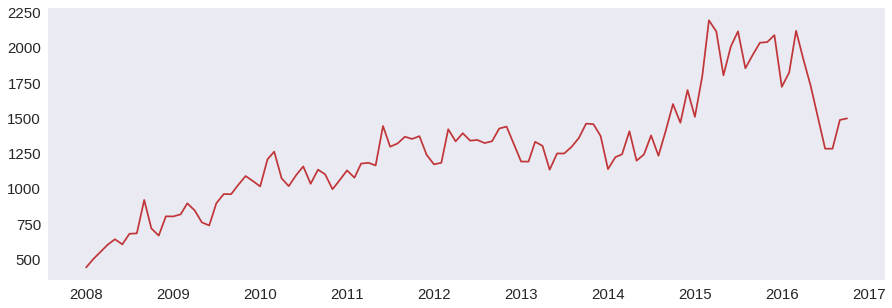

In [147]:
from datetime import date

data['date'] = [date(dt.year, dt.month, 1) for dt in data.published]
data['date'].value_counts().plot()

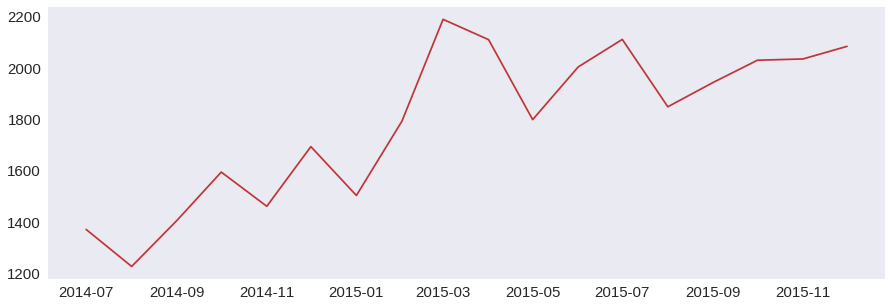

In [148]:
data[(data['date'] > np.datetime64('2014-06-01')) & (data['date'] < np.datetime64('2016-01-01'))]['date'].value_counts().plot()

In [149]:
month_with_max_posts = data['date'].value_counts().index[0]
print('Максимальное кол-во публикаций было ' + str(month_with_max_posts.month) + ' ' + str(month_with_max_posts.year))

Максимальное кол-во публикаций было 3 2015


**2. Проанализируйте публикации в месяце из предыдущего вопроса**

In [0]:
#Создаем отдельные столбики с датой, днем недели и часов публикации
data['day'] = [dt.day for dt in data.published]
data['dayofweek'] = [dt.isoweekday() for dt in data.published]
data['hour'] = [dt.hour for dt in data.published]

#Создаем столбик с меткой на Хабре или Гиктаймс была выложена статья
for name in ['habrahabr', 'geektimes']:
  site_list = []
  for sitename in data.domain:
    if name in sitename:
      response = 1
    else:
      response = 0
    site_list.append(response)
  data[str(name)] = site_list

#По заданию анализировать нужно только месяц, полученный в прошлом задании
data_for_analyse = data[(data['date'] == month_with_max_posts)]

In [151]:
data_for_analyse.head(15).T

,97666,97667,97668,97669,97670,97671,97672,97673,97674,97675,97676,97677,97678,97679,97680
url,https://habrahabr.ru/post/251783/,https://habrahabr.ru/company/kolibrios/blog/23...,https://habrahabr.ru/post/286286/,https://habrahabr.ru/post/251347/,https://habrahabr.ru/post/251765/,https://habrahabr.ru/post/251793/,https://habrahabr.ru/post/251747/,https://geektimes.ru/company/soundpal/blog/246...,https://geektimes.ru/post/246572/,https://habrahabr.ru/post/251797/,https://habrahabr.ru/post/251077/,https://habrahabr.ru/post/251801/,https://habrahabr.ru/company/krita/blog/251803/,https://habrahabr.ru/post/251805/,https://geektimes.ru/post/246578/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru,geektimes.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,251783,239033,286286,251347,251765,251793,251747,246570,246572,251797,251077,251801,251803,251805,246578
published,2015-03-01 00:00:00,2015-03-01 00:09:00,2015-03-01 07:13:00,2015-03-01 07:52:00,2015-03-01 10:30:00,2015-03-01 12:04:00,2015-03-01 12:26:00,2015-03-01 12:45:00,2015-03-01 13:37:00,2015-03-01 13:55:00,2015-03-01 14:00:00,2015-03-01 14:47:00,2015-03-01 14:51:00,2015-03-01 14:52:00,2015-03-01 15:06:00
author,@SLY_G,NaN,@semen_grinshtein,@Makeman,@Doomer3D,@4p4,@PavelVelikhov,NaN,@marks,@PerlPower,@ilusha_sergeevich,@olegafx,NaN,@RoboForm,@marks
flow,develop,develop,misc,develop,develop,develop,develop,NaN,NaN,develop,develop,develop,develop,develop,NaN
polling,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True
content_len,49647,8581,1883,48658,40374,12410,23204,3992,2756,9110,15427,6909,6429,9985,5604
title,Введение в разработку слайд-шоу на JavaScript,Дайджест KolibriOS #7: как мы зиму перезимовали,"9 марта компания Apple сделает то, что не дела...",Context Model Pattern via Aero Framework,Заполнение текстовых шаблонов данными на основ...,Философия программирования 5 — Колибри и Реактос,Сделай сам: MSc Computer Science на уровне топ...,Sony выпустила специальные карты памяти для чи...,«Хоровод» — первое упоминание трех законов роб...,Статичный хостинг: жизнь после смерти narod.ru,Несколько интересностей и полезностей для веб-...,"SummaryJS, выпуск 3","Krita 2.9: Черновые профили кистей, заблокиров...",Дайджест интересных материалов для мобильного ...,"ГМО — это не только полезно, но еще и вкусно? ..."
comments,6,14,12,6,4,68,63,14,35,50,8,11,23,2,233


Один или несколько дней сильно выделяются из общей картины?

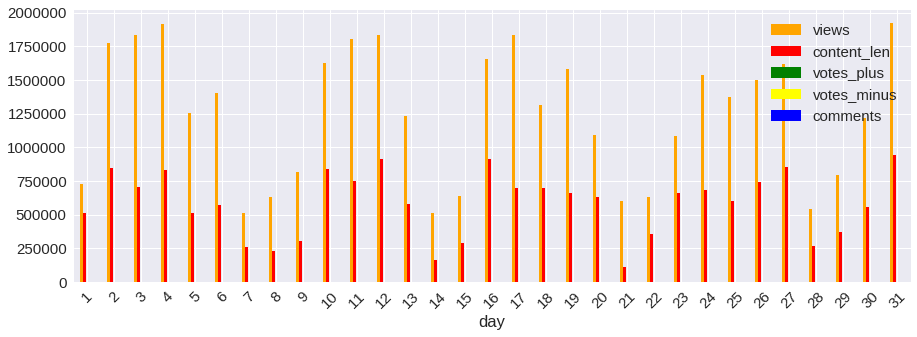

In [152]:
corr_day_data = data_for_analyse[['day'] + ['views'] + ['content_len'] + [votes for votes in data_for_analyse.columns if 'votes' in votes] + ['comments']]
corr_day_data.groupby('day').sum().plot(kind='bar', rot=45, grid=True, color=['orange','red','green', 'yellow','blue'])

*Я не уверен как интерпретировать результат, но как я не меняю входные данные, результат всегда постоянный. Во все дни общее количество просмотров значительно (Как правило не меньше чем в половину) обгоняет другие показатели, так что я могу заключить, что общая картина не изменяется.*

На хабре всегда больше статей, чем на гиктаймсе?

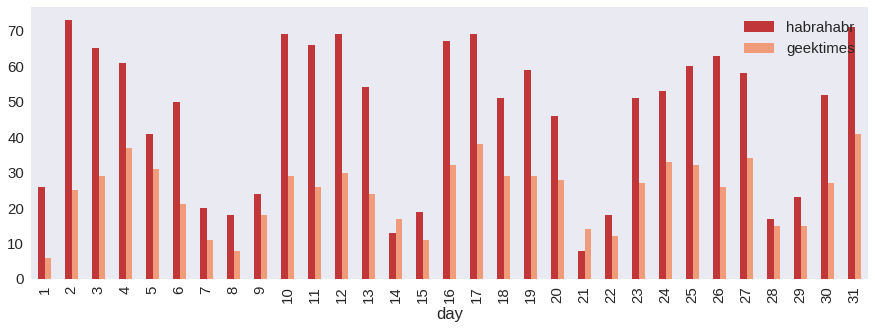

In [153]:
count_posts_data = data_for_analyse[['day'] + ['habrahabr'] + ['geektimes']]
count_posts_data.groupby('day').sum().plot(kind='bar')

*Несколько дней заметны, где Гиктаймс опередил Хабр*

По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей?

Text(0.5,1,'Кол-во статей по субботам за все время')

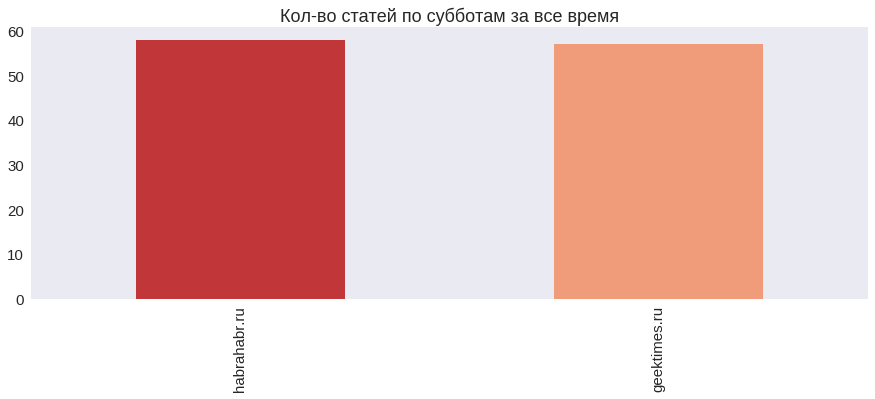

In [154]:
saturday_analyse = data_for_analyse[ (data_for_analyse['dayofweek'] == 6) ]['domain']

saturday_analyse.value_counts().plot(kind='bar')
plt.title('Кол-во статей по субботам за все время')

*Разница всего в пару статей*

**3. Когда лучше всего публиковать статью?**

Больше всего просмотров набирают статьи, опубликованные в 12 часов дня?

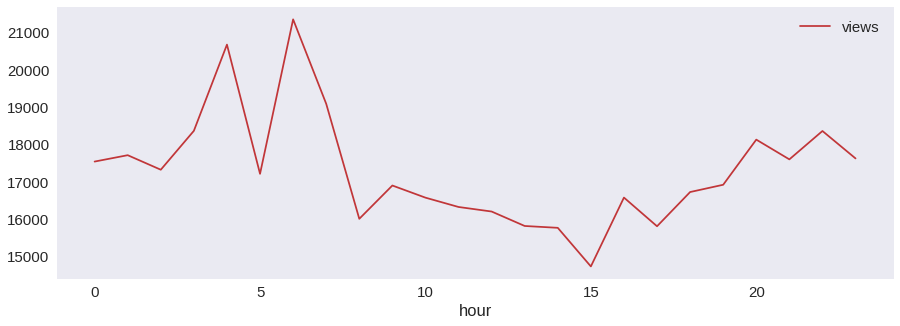

In [165]:
corr_views_and_times = data[['views'] + ['hour']]
corr_views_and_times.groupby('hour').mean().plot()

*Нет, неверно, правильный максимум где-то ночью.*

У опубликованных в 10 утра постов больше всего комментариев?

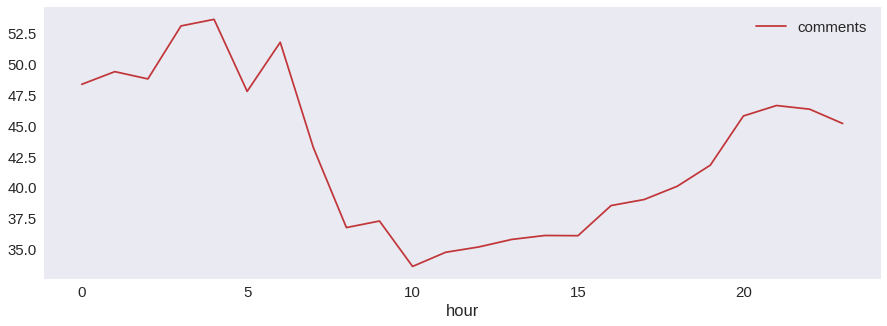

In [166]:
corr_comments_and_times = data[['comments'] + ['hour']]
corr_comments_and_times.groupby('hour').mean().plot()

*Как видно, комментарии тоже пишут в основном ночью.*

Больше всего просмотров набирают статьи, опубликованные в 6 часов утра?

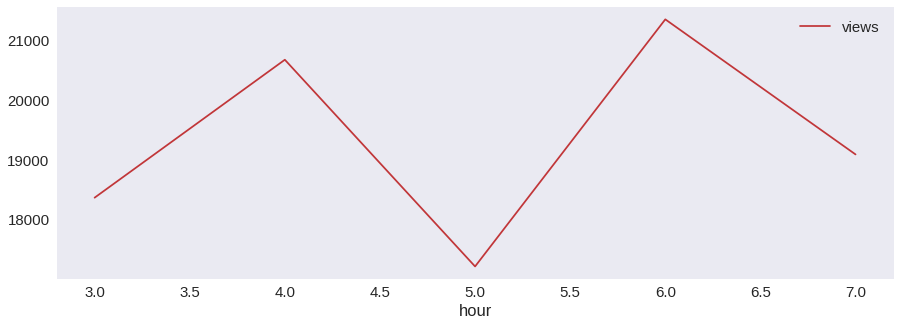

In [171]:
corr_views_and_times[(corr_views_and_times['hour'] > 2) & (corr_views_and_times['hour'] < 8) ].groupby('hour').mean().plot()

*Приближаем график из задания 1. Действительно, пик приходится примерно на 6 утра. *

Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера?

In [0]:
#См вариант ответа 2

На хабре дневные статьи комментируют чаще, чем вечерние?

In [0]:
#См вариант ответа 2

**4. Кого из топ-20 авторов чаще всего минусуют?**

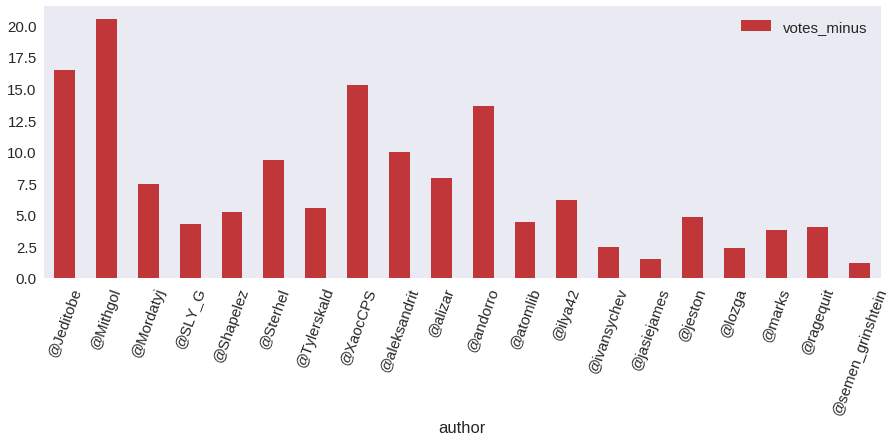

In [162]:
authors_data = data[['author'] + ['votes_minus']]

top_authors = authors_data['author'].value_counts()[:20].index

top_authors_data = authors_data[authors_data['author'].isin(top_authors) ]
top_authors_data.groupby('author').mean().plot(kind='bar', rot=70)

*Не сразу сообразил, что нужно взять еще среднее значение. Результат кардинально изменился, но фаровит налицо. *

**5. Сравните субботы и понедельники**

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

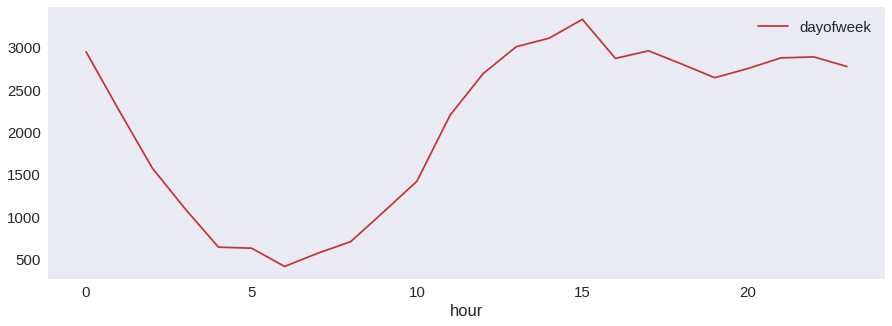

In [173]:
saturday_corr = data[['dayofweek'] + ['hour']][(data['dayofweek'] == 6)]
#sns_plot = sns.pairplot( saturday_corr[['dayofweek','hour']])
saturday_corr.groupby('hour').sum().plot()

*В субботу авторы наиболее активны после 12 часов, что соответствует дню. (Если брать, что день идет с 12 до 18). Хотя и вечером большая активность, но уже поменьше дневной.*

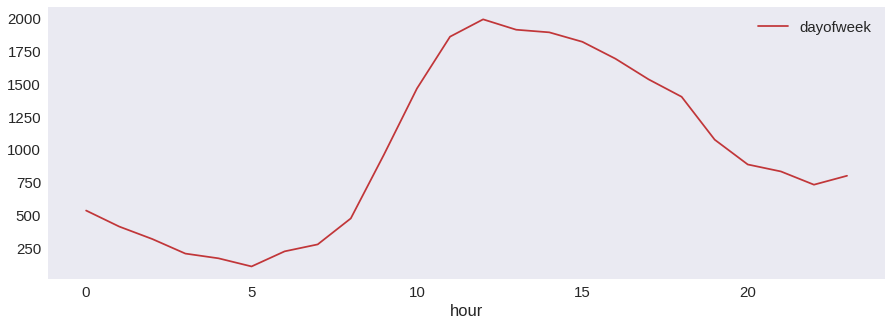

In [164]:
monday_corr = data[['dayofweek'] + ['hour']][(data['dayofweek'] == 1)]
monday_corr.groupby('hour').sum().plot()

*По вечерам ситуация похожа на субботу. Здесь активность пользователей начинается раньше, но основная масса так же происходит днем. К вечеру активность, напротив утверждению, значительно снижается. *

**Меня больше всего веселит тот факт, что в примерах и объяснениях они сами почти все задания сделали без графиков
Пусть со второго раза, но удалось все выполнить и осознать. Фуф **
:C

![alt text](https://pp.userapi.com/c824502/v824502197/1838f0/gByq-bBlOEA.jpg)